  ## Week 7 Homework: Income Evaluation

#### Importing dependencies 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
%config IPCompleter.use_jedi=False

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## Data Understanding

In [5]:
income_df = pd.read_csv('income_evaluation.csv')
df=income_df.copy()

In [6]:
df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [7]:
df.count()

age                32561
 workclass         32561
 fnlwgt            32561
 education         32561
 education-num     32561
 marital-status    32561
 occupation        32561
 relationship      32561
 race              32561
 sex               32561
 capital-gain      32561
 capital-loss      32561
 hours-per-week    32561
 native-country    32561
 income            32561
dtype: int64

In [8]:
df.shape

(32561, 15)

In [9]:
df.describe()

age        fnlwgt   education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  
count   32561.000000     32561.000000  
mean       87.303830        40.437456  
std       402.960219        12.347429  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        40.000000  
75%         0.000000        45.000000  
max      4356.000000        99.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

No null value

In [12]:
#checking target
df[" income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
df.columns = df.columns.str.replace(' ', '')   #removing spaces from column  names 
df.columns = df.columns.str.replace('-', '_') # replacing hypens with  underscore
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Visualisation and report of data

In [13]:
#profile report for explarototy view and correlations
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='income', ylabel='count'>

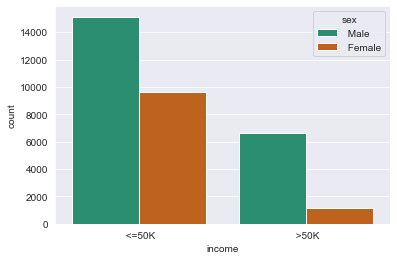

In [14]:
#count-plot of people  
import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='income', hue='sex', data=df, palette='Dark2')

We clearly see that not only the number of males that earns more than 50k/year is approximately 2 times greater than that of females, but also they generally earns more.

<AxesSubplot:xlabel='income', ylabel='count'>

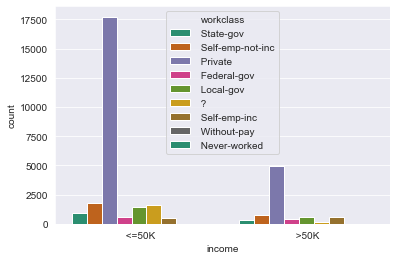

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='income', hue='workclass', data=df, palette='Dark2')

<AxesSubplot:xlabel='income', ylabel='count'>

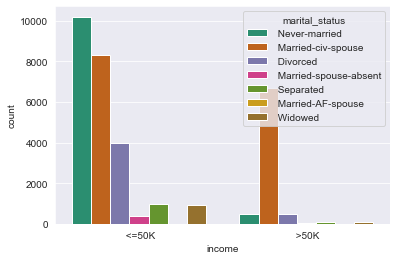

In [16]:
sns.set_style('darkgrid')
sns.countplot(x='income', hue='marital_status', data=df, palette='Dark2')

### Data Cleaning 

We have seen there are some groups named as " ?", we will replace them with NANs

#### 1.Cleaning missing/bad coded variables

In [17]:
# checking whether the cells contains special characters  
df.isin([" ?"]).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [18]:
#country will not be used, therefore no need to delete rows for country
df['workclass'] = df['workclass'].replace(" ?",np.nan)   # replacing ? character with NaN
df['occupation'] = df['occupation'].replace(" ?",np.nan)
df.dropna(how='any',inplace=True)  #drop nan rows 

In [19]:
df.isin([" ?"]).sum(axis=0) #check again

age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64

In [20]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

#### 2.Checking for ourliers

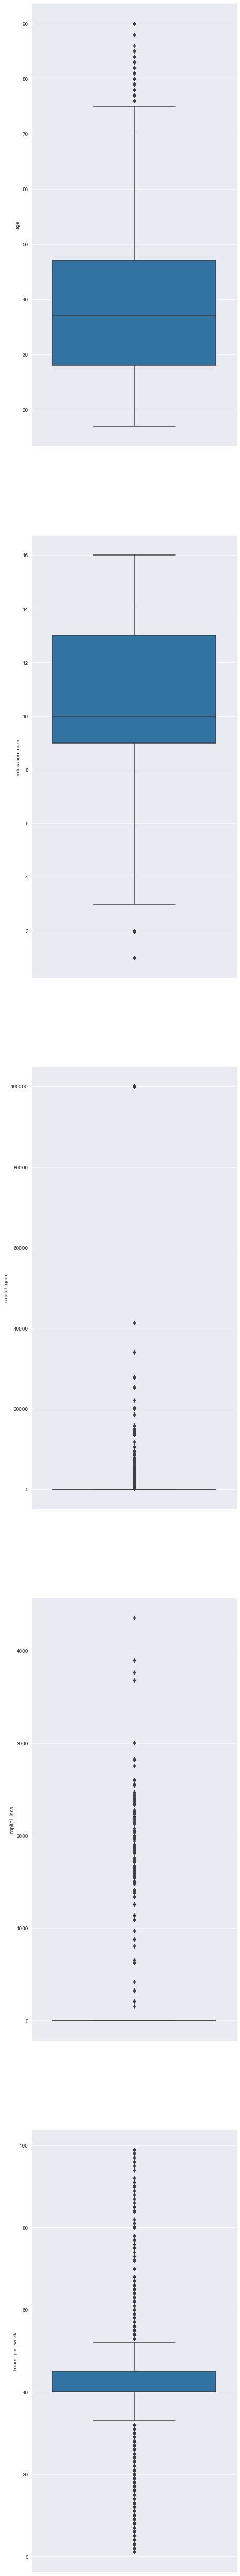

In [21]:
column_list=['age', 'education_num' ,'capital_gain', 'capital_loss', 'hours_per_week']
fig, axes=plt.subplots(nrows=len(column_list), figsize=(7,90))
for i in range (len(column_list)):
    sns.boxplot(ax=axes[i],y=column_list[i], data=df)

In [22]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

For each column the interquartile range will be defined and outliers will be coursed to the nearest point that 
is not regarded as an outlier.

In [23]:
for col in column_list:
    lowerbound,upperbound=outlier_treatment(df[col])
    df[col]=np.clip(df[col],a_min=lowerbound, a_max=upperbound)

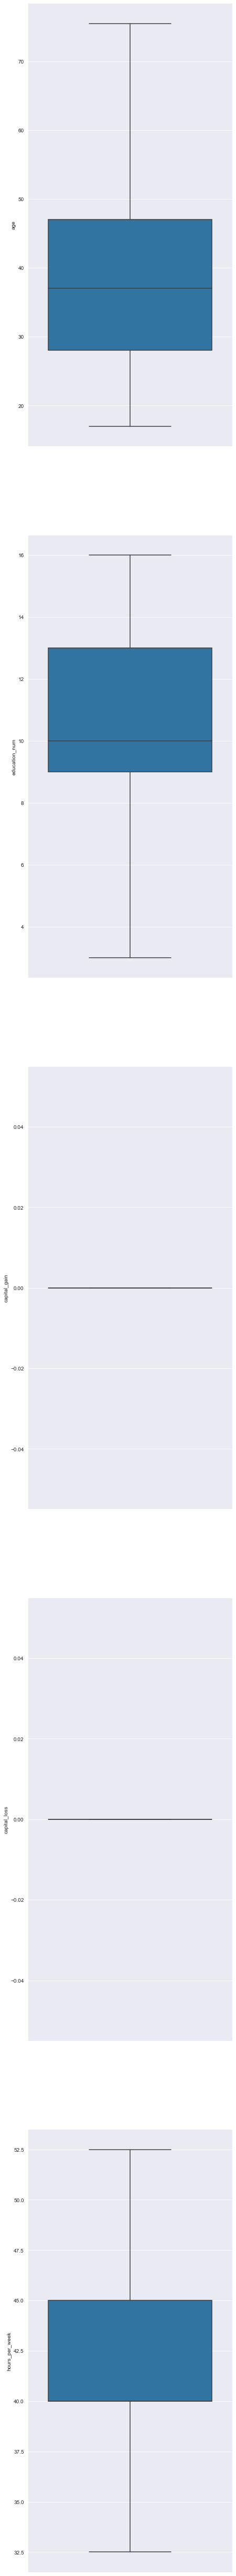

In [24]:
#checking for outliers again
fig, axes=plt.subplots(nrows=len(column_list), figsize=(7,90))
for i in range (len(column_list)):
    sns.boxplot(ax=axes[i],y=column_list[i], data=df)

**No outliers**

#### 3.Determination of categorical variables

In [25]:
categoricals_list=[]
for col in df.drop("income", axis=1).columns:
    print(col,":", df[col].value_counts().count())
    if df[col].value_counts().count()<20:
        categoricals_list.append(col)
if (len(categoricals_list)==0):
    print("No categorical variables")
else:
    print("\nCategorical variables: ")
    for i in range(0, len(categoricals_list)):
        print(categoricals_list[i], end=", ")

age : 60
workclass : 7
fnlwgt : 20495
education : 16
education_num : 14
marital_status : 7
occupation : 14
relationship : 6
race : 5
sex : 2
capital_gain : 1
capital_loss : 1
hours_per_week : 22
native_country : 42

Categorical variables: 
workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, 

#### 4. Checking for imbalance in target(income) variable

In [26]:
from collections import Counter
tg_column=df.values[:,-1]
class_counter = Counter(tg_column)
for i, j in class_counter.items():
    per = j / len(tg_column) * 100
    print("Class:",i," Count:", j, "Percent of total:", round(per),"%")

Class:  <=50K  Count: 23068 Percent of total: 75 %
Class:  >50K  Count: 7650 Percent of total: 25 %


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30718 non-null  float64
 1   workclass       30718 non-null  object 
 2   fnlwgt          30718 non-null  int64  
 3   education       30718 non-null  object 
 4   education_num   30718 non-null  int64  
 5   marital_status  30718 non-null  object 
 6   occupation      30718 non-null  object 
 7   relationship    30718 non-null  object 
 8   race            30718 non-null  object 
 9   sex             30718 non-null  object 
 10  capital_gain    30718 non-null  int64  
 11  capital_loss    30718 non-null  int64  
 12  hours_per_week  30718 non-null  float64
 13  native_country  30718 non-null  object 
 14  income          30718 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


We see that fnlwgt, capital_gain, capital_loss, hours_per_week contain very big numbers and they have no logical affect on model(capital_gain, capital loss consist of 95% zeros, it will affect adversely on our model, therefore we need to remove them:

In [28]:
df.drop(['fnlwgt', 'capital_gain','capital_loss','hours_per_week', 'native_country'], axis=1, inplace=True)

In [29]:
df.head()

age          workclass   education  education_num       marital_status  \
0  39.0          State-gov   Bachelors             13        Never-married   
1  50.0   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2  38.0            Private     HS-grad              9             Divorced   
3  53.0            Private        11th              7   Married-civ-spouse   
4  28.0            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  income  
0        Adm-clerical   Not-in-family   White     Male   <=50K  
1     Exec-managerial         Husband   White     Male   <=50K  
2   Handlers-cleaners   Not-in-family   White     Male   <=50K  
3   Handlers-cleaners         Husband   Black     Male   <=50K  
4      Prof-specialty            Wife   Black   Female   <=50K

In [30]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'income'],
      dtype='object')

#### Categorizing age variable: Grouping in terms of age groups

In [31]:
df["age"].describe()

count    30718.000000
mean        38.410020
std         13.009714
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         75.500000
Name: age, dtype: float64

In [32]:
# grouping age classes , we see that worker's age changes from 17(min) to 90(max)

In [33]:
bins= [16,25,35, 50,65,91] #groups as, aged to 16, to 25 and etc.
labels = [0, 1,2,3, 4]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [34]:
df.drop(["age"], axis=1, inplace=True)  #dropping age columnn
df.head()

workclass   education  education_num       marital_status  \
0          State-gov   Bachelors             13        Never-married   
1   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2            Private     HS-grad              9             Divorced   
3            Private        11th              7   Married-civ-spouse   
4            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  income age_group  
0        Adm-clerical   Not-in-family   White     Male   <=50K         2  
1     Exec-managerial         Husband   White     Male   <=50K         3  
2   Handlers-cleaners   Not-in-family   White     Male   <=50K         2  
3   Handlers-cleaners         Husband   Black     Male   <=50K         3  
4      Prof-specialty            Wife   Black   Female   <=50K         1

In [35]:
df["education_num"].describe()

count    30718.000000
mean        10.138388
std          2.537711
min          3.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education_num, dtype: float64

As we have education column to categorize the people in terms of education, we do not need education_num column

In [36]:
df.drop(["education_num"], axis=1, inplace=True)  #dropping education_num columnn
df.head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  income age_group  
0   Not-in-family   White     Male   <=50K         2  
1         Husband   White     Male   <=50K         3  
2   Not-in-family   White     Male   <=50K         2  
3         Husband   Black     Male   <=50K         3  
4            Wife   Black   Female   <=50K         1

In [37]:
for i in df.columns:   #checking how to code the other columns in terms of values
    print (i)
    print (df[i].value_counts())
    print("-"*20)

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64
--------------------
education
 HS-grad         9968
 Some-college    6775
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1020
 10th             831
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64
--------------------
marital_status
 Married-civ-spouse       14339
 Never-married             9912
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital_status, dtype: int64
--------------------
occupation
 Prof-specialty       4140
 Cra

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   workclass       30718 non-null  object  
 1   education       30718 non-null  object  
 2   marital_status  30718 non-null  object  
 3   occupation      30718 non-null  object  
 4   relationship    30718 non-null  object  
 5   race            30718 non-null  object  
 6   sex             30718 non-null  object  
 7   income          30718 non-null  object  
 8   age_group       30718 non-null  category
dtypes: category(1), object(8)
memory usage: 2.1+ MB


In [39]:
df.isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
income            0
age_group         0
dtype: int64

In [41]:
income = pd.get_dummies(df['income'],prefix='Income', drop_first=True)

In [42]:
df.drop(['income'], axis=1,inplace=True) # removing columns to create new ones
df= pd.concat([df,income],axis=1)# concatenate new income column

### Train-Test Split 

In [43]:
X = df.drop('Income_ >50K',axis=1)
y = df['Income_ >50K']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

In [45]:
print(X.shape, y.shape)

(30718, 8) (30718,)


## Pipeline

In [46]:
import grapevine as pn

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [58]:
##all features are categorical that are left
features= X.select_dtypes(include=['object', 'category']).columns

In [59]:
#recoding categorical variables with one hot encoder as they are not ordinals for label encoding.
categorical_pipeline = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore')) #handle_unknow is use for unknown values transform onehotencoding
    ])

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, features)
    ])

mypipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=101))
                            
    ])

In [68]:
mypipeline.fit(X_train,y_train)
print("Accuracy score of model: ", round(mypipeline.score(X_test,y_test), 2))

Accuracy score of model:  0.84


In [62]:
y_pred = mypipeline.predict(X_test)

In [63]:
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

### Evaluation of the model

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6921
           1       0.72      0.57      0.63      2295

    accuracy                           0.84      9216
   macro avg       0.79      0.75      0.76      9216
weighted avg       0.83      0.84      0.83      9216



In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
print("AUC score: ", round(roc_auc_score(y_test,y_pred), 2))

AUC score:  0.75


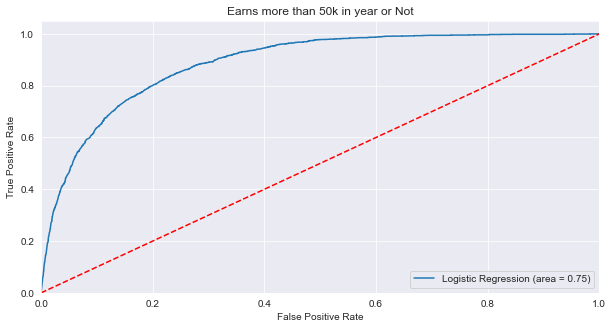

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, mypipeline.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mypipeline.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Earns more than 50k in year or Not')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()